In [73]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

class Perceptron_Custom:
    def __init__(self, d, iter_num, transformation = False):
        if transformation:
            self.w = np.random.rand((d+1+3))
        else:
            self.w = np.random.rand((d+1))
        self.iter = iter_num
        self.transformation = transformation
    
    
    def fit_sep(self, X, y):
        if self.transformation:
            X = self.feat_transform(X)
        
        X = self.augment_feats(X)
        error_vec = []
        w_vec = []
        w_best = self.w
        for iterations in range(0,self.iter):
            error = 0
            for i,examples in enumerate(X):
                
                product = np.dot(w_best, np.transpose(examples))
                
                if (y[i]==1 and product<0) :
                    error+=1
                    w_best = w_best + 0.01 *examples
                elif y[i]==0 and product>0:
                    error+=1
                    w_best = w_best - 0.01 * examples
            # print(error)
            error_vec.append(error/X.shape[0])
            w_vec.append(w_best)
        index = error_vec.index(min(error_vec))
        self.w = w_vec[index]
        return error_vec
                
    
    def augment_feats(self, X):
        aug_X = np.ones((X.shape[0], X.shape[1]+1))
        aug_X[:, :-1] = X
        return aug_X
    
    def predict_examples(self, test_X):
        if self.transformation:
            test_X = self.feat_transform(test_X)
        aug_test_X = self.augment_feats(test_X)
        product = np.dot(self.w, np.transpose(aug_test_X))
        
        label = product>0
        return label + np.zeros((label.shape))
    
    def feat_transform(self, X):
        feat_trans = np.empty((X.shape[0],0))
        feat_trans = np.append(feat_trans, X[:, 0].reshape(-1, 1), axis = 1)
        feat_trans = np.append(feat_trans, X[:, 1].reshape(-1, 1), axis = 1)
        feat_trans = np.append(feat_trans, (X[:, 0]**2).reshape(-1, 1), axis = 1)
        feat_trans = np.append(feat_trans, (X[:, 1]**2).reshape(-1, 1), axis = 1)
        feat_trans = np.append(feat_trans, np.multiply(X[:, 0], X[:, 1]).reshape(-1, 1), axis = 1)
        
        return feat_trans
                               
                
    

    
# size of data ==> n X d
# size of augmented data ==> n X (d+1)
# size of y ==> n X 1
# size of w ==> 1 X d+1

In [74]:
data_arr = np.loadtxt('../german.data-numeric')
data_arr.shape

(1000, 25)

In [75]:
X, y = data_arr[:, :24], data_arr[:, -1]
y[y == 2] = 0
X.shape, y.shape

((1000, 24), (1000,))

80:20 split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

D = 24
X_train_0 = X_train[y_train == 0]
X_train_1 = X_train[y_train == 1]
X_test_0 = X_test[y_test == 0]
X_test_1 = X_test[y_test == 1]
X_train = np.append(X_train_1, X_train_0, axis = 0)
X_test = np.append(X_test_1, X_test_0, axis = 0)

# generate labels
y_train = np.append(np.ones((int(X_train_1.shape[0]))), np.zeros((int(X_train_0.shape[0]))), axis = 0)
y_test = np.append(np.ones((int(X_test_1.shape[0]))), np.zeros((int(X_test_0.shape[0]))), axis = 0)

70:30 split


In [88]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# X_train.shape, y_train.shape, X_test.shape, y_test.shape

# D = 24
# X_train_0 = X_train[y_train == 0]
# X_train_1 = X_train[y_train == 1]
# X_test_0 = X_test[y_test == 0]
# X_test_1 = X_test[y_test == 1]
# X_train = np.append(X_train_1, X_train_0, axis = 0)
# X_test = np.append(X_test_1, X_test_0, axis = 0)

# # generate labels
# y_train = np.append(np.ones((int(X_train_1.shape[0]))), np.zeros((int(X_train_0.shape[0]))), axis = 0)
# y_test = np.append(np.ones((int(X_test_1.shape[0]))), np.zeros((int(X_test_0.shape[0]))), axis = 0)

In [89]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 24)
(300, 24)
(700,)
(300,)


In [90]:

percep = Perceptron_Custom(D, 5000, transformation = False)


In [91]:
X_shuff, y_shuff = shuffle(X_train, y_train)
    
error_vec = percep.fit_sep(X_shuff, y_shuff)


In [93]:
# generate predictions
test_pred = percep.predict_examples(X_train)

# determine test accuracy
acc = accuracy_score(test_pred, y_train)
print(acc)
# determine F-1 score
f1 = f1_score(test_pred, y_train)
print(f1)


# confusion matrix
confusion_matrix(test_pred, y_train)

0.7242857142857143
0.7908992416034669


array([[142, 128],
       [ 65, 365]])

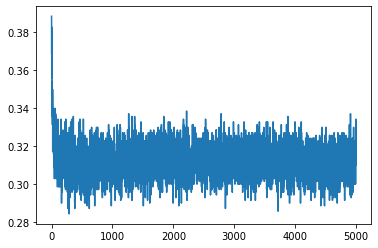

In [49]:
plt.plot(error_vec)